# UAS Obstacle Avoidance Integrating Safety Bound with Reinforcement Learning
Author: Jueming Hu, Arizona State University

Email: jueming.hu@asu.edu

This module demonstrates motion planning for UAS obstacle avoidance. We integrate a probabilistic dynamic anisotropic operational safety bound as airspace reservation with reinforcement learning method. The operational
safety bound is based on UAS performance, weather condition and uncertainties in UAS operations, such as positioning error. Based on the operational safety bound concept, a new reward function in reinforcement learning is developed. The proposed methodology results in a trajectory prediction model under risk-based dynamic separation criterion. The algorithm of Q learning is adopted to find the optimal path planning. Simulation of avoiding static obstacles is conducted to show the deconflict capability.


The detailed information can be found [here](https://arc.aiaa.org/doi/abs/10.2514/6.2020-1372)

## <font size=6> Code Requirements

<font size=3.5> This code has been tested under python 3.7.
    
The required Python packages for this module are:
- **gym, itertools, matplotlib, numpy, pandas, collections**

In [1]:
import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys
from matplotlib import colors
import matplotlib.pyplot as plt
from collections import defaultdict

* **<font size=3.5>Developed function files:**
    * <font size=3>*plotting.py*:  visualization of RL training process
    * *SafetyBound.py*:            obtain the size of safety bound.
    * *geometryCheck.py*:          check potential collision among different shapes.
    * *ObstacleAvoidanceENV.py*:   define RL environment, including transition model and reward function.
    * *draw.py*:                   visualization of trajectories
    * *Q_learning.py*:             Q-learning algorithm

In [2]:
from ObstacleAvoidanceENV import UAVEnv
from ObstacleAvoidanceENV import polysize1
from ObstacleAvoidanceENV import polysize2
from ObstacleAvoidanceENV import polysize3
from ObstacleAvoidanceENV import polysize4
import plotting
from draw import Draw
from draw import trajectory
from draw import trajectory2
from Q_learning import q_learning

### <font size=5.5> Environment setup

 <font size=4>  1. Define the starting point and destination

In [3]:
origin1 = (49, 0)
des=(0, 49)

 <font size=4>  2. Generate the model without safety bound during training

In [4]:
env1 = UAVEnv(origin1, des, 'Without')

 <font size=4>  3. Generate the model with safety bound during training

In [5]:
env2 = UAVEnv(origin1, des, 'With')

### <font size=5.5>Example

#### <font size=5> Case study I: Planning without safety bound

<font size=4> 1. Solve using Q-learning

In [6]:
Q, stats, trajectories = q_learning(env1, 3000)

Episode 3000/3000.

<font size=4> 2. Save the learned trajectory

In [7]:
with open('multiPoly_withoutbound.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(trajectories.shape))
    for data_slice in trajectories:
        np.savetxt(outfile, data_slice, fmt='%-7.2f')
        outfile.write('# New slice\n')

<font size=4> 3. Visualization of the learned trajectory
    
    show the agent's position at each time step

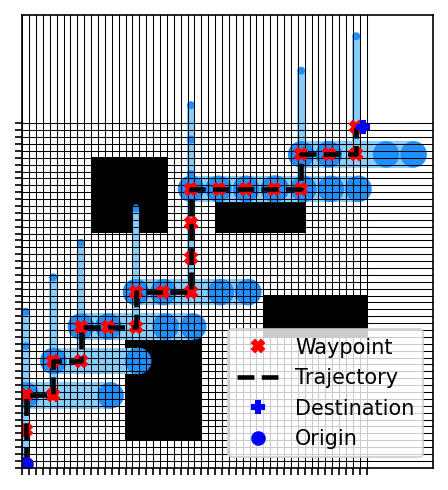

In [8]:
trajectories1 = np.loadtxt('multiPoly_withoutbound.txt')
trajectories1 = trajectories1.astype(int)
trajectories1 = trajectories1.reshape((1, 23, 3))
plt.rcParams['figure.dpi'] = 150
trajectory(trajectories1[0,:,0], (50,50), polysize1, polysize2, polysize3, polysize4)

<font size=4> 4. Visualization of the RL learning process

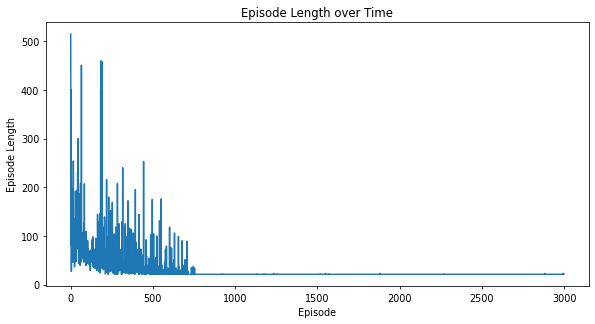

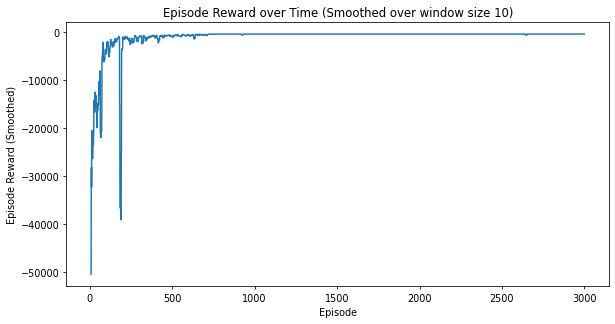

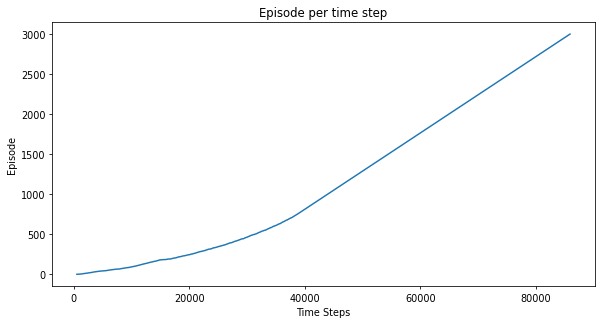

(<Figure size 700x350 with 1 Axes>,
 <Figure size 700x350 with 1 Axes>,
 <Figure size 700x350 with 1 Axes>)

In [9]:
plt.rcParams['figure.dpi'] = 70
plotting.plot_episode_stats(stats)

#### <font size=5> Case study II: Planing with safety bound

<font size=4> 1. Solve using Q-learning

In [10]:
Q, stats, trajectories = q_learning(env2, 3000)

Episode 3000/3000.

<font size=4> 2. Save the learned trajectory

In [11]:
with open('multiPoly_withbound.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(trajectories.shape))
    for data_slice in trajectories:
        np.savetxt(outfile, data_slice, fmt='%-7.2f')
        outfile.write('# New slice\n')

<font size=4> 3. Visualization of the learned trajectory
    
    show the agent's position at each time step

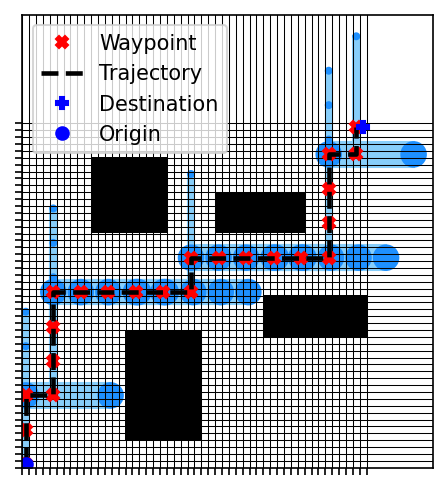

In [12]:
trajectories2 = np.loadtxt('multiPoly_withbound.txt')
trajectories2 = trajectories2.astype(int)
trajectories2 = trajectories2.reshape((1, 23, 3))
plt.rcParams['figure.dpi'] = 150
trajectory(trajectories2[0,:,0], (50,50), polysize1, polysize2, polysize3, polysize4)

<font size=4> 4. Visualization of the RL learning process

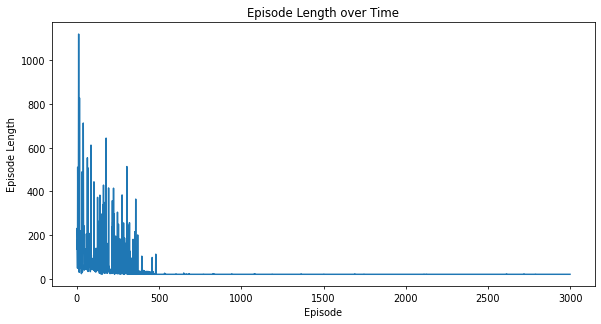

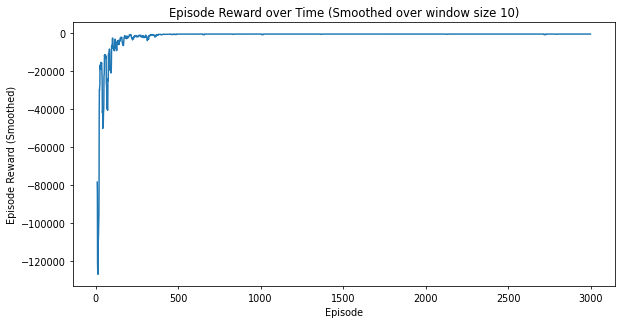

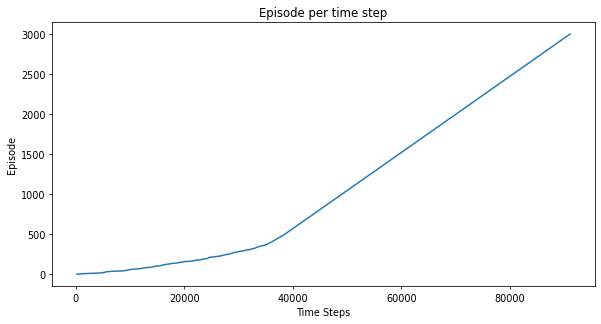

(<Figure size 700x350 with 1 Axes>,
 <Figure size 700x350 with 1 Axes>,
 <Figure size 700x350 with 1 Axes>)

In [13]:
plt.rcParams['figure.dpi'] = 70
plotting.plot_episode_stats(stats)

#### <font size=5> Comparison of the two trajectories

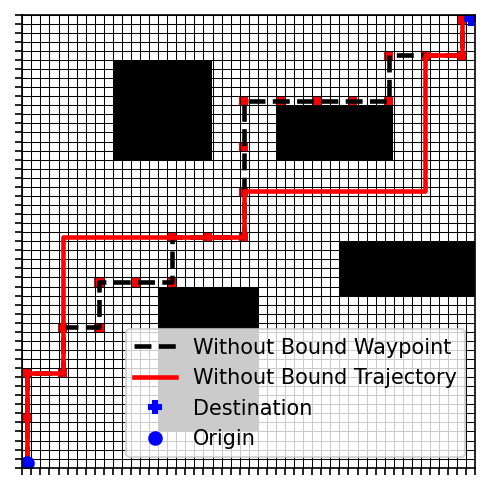

In [14]:
plt.rcParams['figure.dpi'] = 150
trajectory2(trajectories1[0,:,0], trajectories2[0,:,0], (50,50), polysize1, polysize2, polysize3, polysize4)